# **Proposta de Trabalho 1 - Mineração de dados**

### **Professor:** Wagner Meira Jr.
### **Aluno:**  Guilherme Mendes de Oliveira
### **Matrícula** 2018046939


### **Tema:** Recomendação de roteiros de viagens
### **Base de dados:** https://raw.githubusercontent.com/GuiMendeees/Dados-tp1-DataMinning/main/travels.csv?token=GHSAT0AAAAAABZ7JQFTWPDQVSNBPLEL73J2Y2KXOEA

Gerador da base: https://github.com/leomaurodesenv/travel-dataset-generator

# Importando Bibliotecas e Dataset

In [ ]:
#Bibliotecas usadas no projeto
#Biblioteca que comporta o algoritmo FPGrowth utilizado na mineração de padrões frequentes proposta
!pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 4.9 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mlxtend as ml
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns.fpgrowth import fpgrowth
from mlxtend.frequent_patterns import association_rules

#Entendimento dos Dados

In [ ]:
dfTravels = pd.read_csv('https://raw.githubusercontent.com/GuiMendeees/Dados-tp1-DataMinning/main/travels.csv?token=GHSAT0AAAAAABZ7JQFTWPDQVSNBPLEL73J2Y2KXOEA')

In [ ]:
dfTravels.shape

(198878, 12)

In [ ]:
dfTravels.sample(10)

,Unnamed: 0,from,to,distance,agency,flightType,price,time,timeMsg,userCode,travelCode,date
177670,177670,Bogotá,Montevideu,460.48,CloudFy,premium,3514.48,1.15,1:9h,22304,88835,2022-10-25 12:45:31.947728
122148,122148,Boa Vista,Cidade do Mexico,823.89,CloudFy,premium,5500.36,2.06,2:3h,15402,61074,2022-10-15 12:37:33.931741
45580,45580,Quebec,Manaus,383.06,CloudFy,premium,2123.37,0.96,0:57h,5713,22790,2022-10-25 12:41:15.414454
97716,97716,Sao Franscisco,Florianopolis,654.17,CloudFy,premium,3988.27,1.64,1:38h,12312,48858,2022-10-15 12:37:33.931741
189302,189302,Brasília,Bogotá,271.49,CloudFy,premium,1202.15,0.68,0:40h,23784,94651,2022-10-15 12:37:33.931741
163189,163189,Curitiba,Buenos Aires,379.82,CloudFy,premium,1733.86,0.95,0:57h,20481,81594,2022-10-28 12:45:04.415296
84864,84864,Lima,Campo Grande,326.72,CloudFy,premium,1520.51,0.82,0:49h,10663,42432,2022-10-25 12:42:30.568110
20146,20146,Cidade do Mexico,Florianopolis,491.07,CloudFy,premium,2856.79,1.23,1:13h,2536,10073,2022-10-15 12:37:33.931741
1281,1281,Joao Pessoa,Orlando,694.74,CloudFy,premium,4177.70,1.74,1:44h,156,640,2022-10-28 12:39:45.670257
197333,197333,Toronto,Recife,383.79,CloudFy,premium,1589.41,0.96,0:57h,24801,98666,2022-10-27 12:46:10.570912


In [ ]:
dfTravels.isnull().sum()

Unnamed: 0    0
from          0
to            0
distance      0
agency        0
flightType    0
price         0
time          0
timeMsg       0
userCode      0
travelCode    0
date          0
dtype: int64

In [ ]:
dfTravels.dtypes

Unnamed: 0      int64
from           object
to             object
distance      float64
agency         object
flightType     object
price         float64
time          float64
timeMsg        object
userCode        int64
travelCode      int64
date           object
dtype: object

In [ ]:
def plotHistogram(df, column):
    D = df[column].value_counts()
    fig, ax = plt.subplots()
    ax.bar(range(len(D)), D.values, align='center')
    plt.xticks(range(len(D)), D.index, rotation=15)
    fig.set_size_inches(20.5, 10)
    ax.set_title(f'Histogram "{column}"')
    ax.set_ylabel('Histogram')
    ax.set_xlabel(f'{column}')
    plt.show()

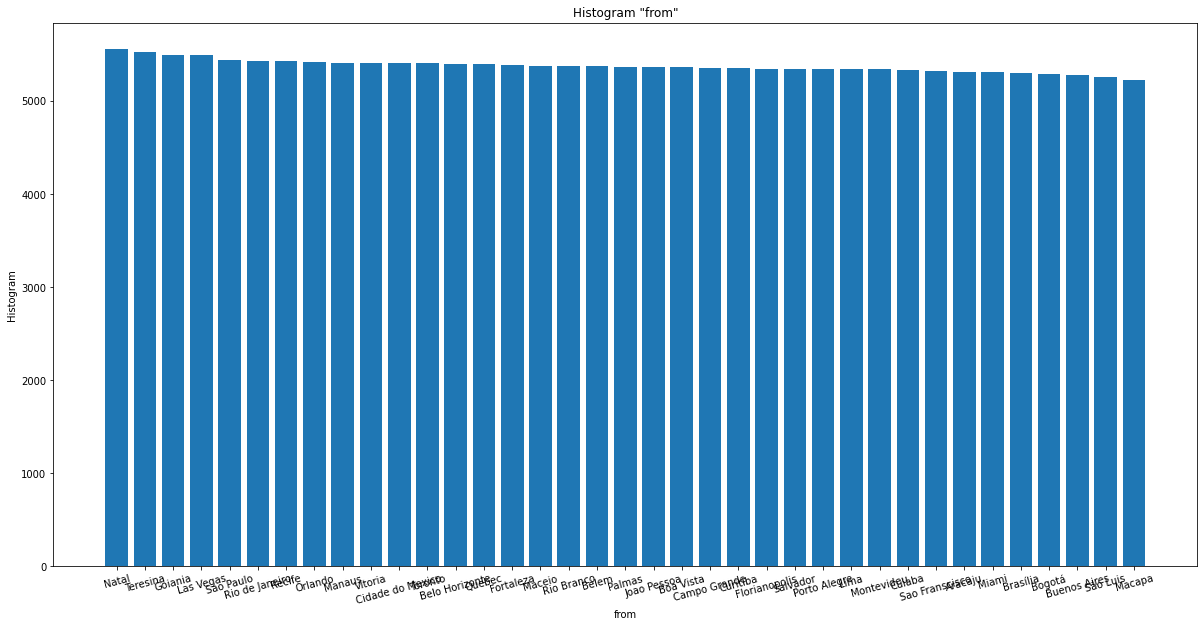

In [ ]:
plotHistogram (dfTravels,'from')

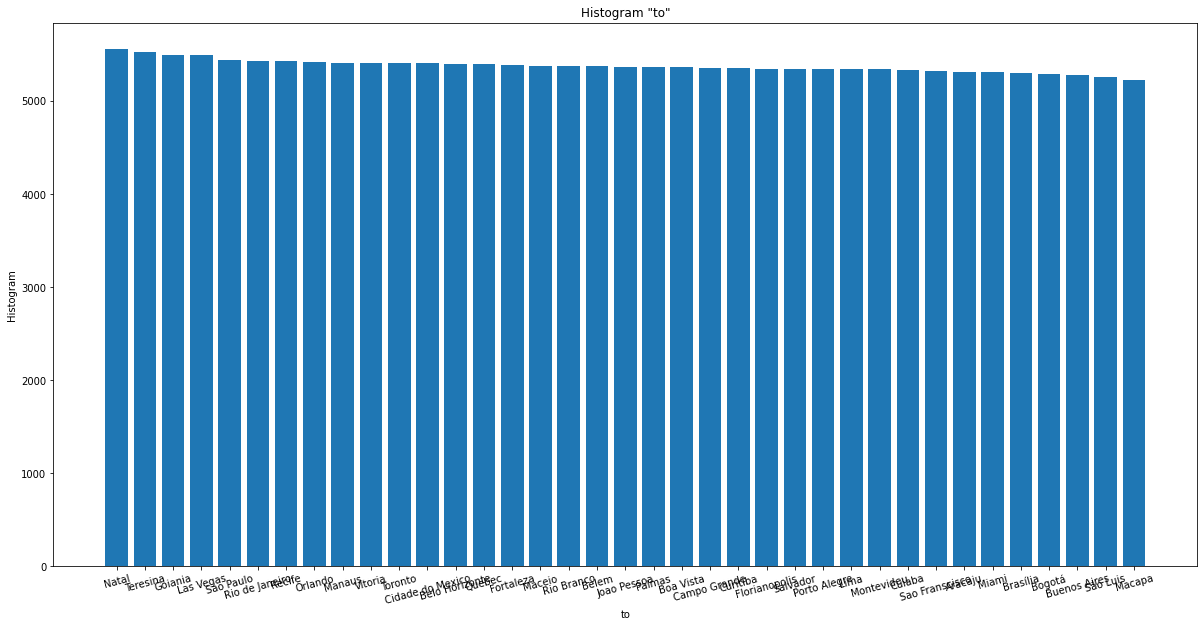

In [ ]:
plotHistogram (dfTravels,'to')

In [ ]:
print('{} usuarios diferentes'.format(dfTravels['userCode'].unique().size))

25000 usuarios diferentes


In [ ]:
print('{} viagens diferentes'.format(dfTravels['travelCode'].unique().size))

99439 viagens diferentes


# Tratamento de Dados

In [ ]:
dfTravels.rename(columns={'Unnamed: 0':'Tid','from':'Partida','to':'Destino'}, inplace=True)
dfTravels['date'] = pd.to_datetime(dfTravels['date'])
dfTravels.dtypes

Tid                    int64
Partida               object
Destino               object
distance             float64
agency                object
flightType            object
price                float64
time                 float64
timeMsg               object
userCode               int64
travelCode             int64
date          datetime64[ns]
dtype: object

In [ ]:
dfTravels['rota'] = dfTravels.Partida.str.cat(dfTravels.Destino, sep='-')
dfTravels.head(5)

,Tid,Partida,Destino,distance,agency,flightType,price,time,timeMsg,userCode,travelCode,date,rota
0,0,Porto Alegre,Macapa,271.15,CloudFy,premium,897.47,0.68,0:40h,0,0,2022-10-15 12:37:33.931741,Porto Alegre-Macapa
1,1,Macapa,Porto Alegre,271.15,CloudFy,premium,1200.83,0.68,0:40h,0,0,2022-10-16 12:37:33.931741,Macapa-Porto Alegre
2,2,Montevideu,Palmas,349.58,CloudFy,premium,1512.58,0.87,0:52h,0,1,2022-10-25 12:39:42.965289,Montevideu-Palmas
3,3,Palmas,Montevideu,349.58,CloudFy,premium,1678.33,0.87,0:52h,0,1,2022-10-28 12:39:42.965289,Palmas-Montevideu
4,4,Vitoria,Maceio,715.76,CloudFy,premium,4546.43,1.79,1:47h,0,2,2022-10-25 12:39:42.970718,Vitoria-Maceio


In [ ]:
### Tratamento para obter apenas uma "perna" da viagem, quando temos uma passagem de ida automaticamente temos uma passagem de volta gerada
dfTravels['Rank'] = dfTravels.groupby(by=['travelCode'])['Partida'].transform(lambda x: x.rank())
dfTravels.head(10)

,Tid,Partida,Destino,distance,agency,flightType,price,time,timeMsg,userCode,travelCode,date,rota,Rank
0,0,Porto Alegre,Macapa,271.15,CloudFy,premium,897.47,0.68,0:40h,0,0,2022-10-15 12:37:33.931741,Porto Alegre-Macapa,2.0
1,1,Macapa,Porto Alegre,271.15,CloudFy,premium,1200.83,0.68,0:40h,0,0,2022-10-16 12:37:33.931741,Macapa-Porto Alegre,1.0
2,2,Montevideu,Palmas,349.58,CloudFy,premium,1512.58,0.87,0:52h,0,1,2022-10-25 12:39:42.965289,Montevideu-Palmas,1.0
3,3,Palmas,Montevideu,349.58,CloudFy,premium,1678.33,0.87,0:52h,0,1,2022-10-28 12:39:42.965289,Palmas-Montevideu,2.0
4,4,Vitoria,Maceio,715.76,CloudFy,premium,4546.43,1.79,1:47h,0,2,2022-10-25 12:39:42.970718,Vitoria-Maceio,2.0
5,5,Maceio,Vitoria,715.76,CloudFy,premium,4452.67,1.79,1:47h,0,2,2022-10-26 12:39:42.970718,Maceio-Vitoria,1.0
6,6,Las Vegas,Sao Franscisco,660.78,CloudFy,premium,3937.31,1.65,1:39h,0,3,2022-10-25 12:39:42.979634,Las Vegas-Sao Franscisco,1.0
7,7,Sao Franscisco,Las Vegas,660.78,CloudFy,premium,4143.90,1.65,1:39h,0,3,2022-10-27 12:39:42.979634,Sao Franscisco-Las Vegas,2.0
8,8,Vitoria,Rio Branco,406.15,CloudFy,premium,2047.56,1.02,1:1h,0,4,2022-10-25 12:39:42.982898,Vitoria-Rio Branco,2.0
9,9,Rio Branco,Vitoria,406.15,CloudFy,premium,3305.82,1.02,1:1h,0,4,2022-10-26 12:39:42.982898,Rio Branco-Vitoria,1.0


In [ ]:
dfRotasIda = dfTravels.loc[dfTravels['Rank'] == 1.0]
dfRotasIda.head(10)

,Tid,Partida,Destino,distance,agency,flightType,price,time,timeMsg,userCode,travelCode,date,rota,Rank
1,1,Macapa,Porto Alegre,271.15,CloudFy,premium,1200.83,0.68,0:40h,0,0,2022-10-16 12:37:33.931741,Macapa-Porto Alegre,1.0
2,2,Montevideu,Palmas,349.58,CloudFy,premium,1512.58,0.87,0:52h,0,1,2022-10-25 12:39:42.965289,Montevideu-Palmas,1.0
5,5,Maceio,Vitoria,715.76,CloudFy,premium,4452.67,1.79,1:47h,0,2,2022-10-26 12:39:42.970718,Maceio-Vitoria,1.0
6,6,Las Vegas,Sao Franscisco,660.78,CloudFy,premium,3937.31,1.65,1:39h,0,3,2022-10-25 12:39:42.979634,Las Vegas-Sao Franscisco,1.0
9,9,Rio Branco,Vitoria,406.15,CloudFy,premium,3305.82,1.02,1:1h,0,4,2022-10-26 12:39:42.982898,Rio Branco-Vitoria,1.0
10,10,Porto Alegre,Salvador,415.96,CloudFy,premium,2318.88,1.04,1:2h,0,5,2022-10-25 12:39:42.986193,Porto Alegre-Salvador,1.0
13,13,Belo Horizonte,Buenos Aires,257.82,CloudFy,premium,950.36,0.64,0:38h,1,6,2022-10-17 12:37:33.931741,Belo Horizonte-Buenos Aires,1.0
14,14,Cidade do Mexico,Toronto,253.55,CloudFy,premium,1180.44,0.63,0:37h,2,7,2022-10-15 12:37:33.931741,Cidade do Mexico-Toronto,1.0
16,16,Cidade do Mexico,Recife,700.86,CloudFy,premium,4717.24,1.75,1:45h,2,8,2022-10-25 12:39:42.996841,Cidade do Mexico-Recife,1.0
18,18,Porto Alegre,Recife,610.03,CloudFy,premium,3809.59,1.53,1:31h,2,9,2022-10-25 12:39:43.000471,Porto Alegre-Recife,1.0


In [ ]:
print('{} rotas de viagens diferentes'.format(dfRotasIda['rota'].unique().size))

666 rotas de viagens diferentes


In [ ]:
dfCountRotas = pd.DataFrame(dfRotasIda['rota'].value_counts().reset_index(name='QtdViagens'),index=None)
dfCountRotas.rename(columns={'index':'rota'}, inplace=True)
dfCountRotas.head(10)

,rota,QtdViagens
0,Buenos Aires-Sao Franscisco,189
1,Maceio-Natal,183
2,Maceio-Palmas,182
3,Bogotá-Brasília,182
4,Goiania-Rio de Janeiro,182
5,Campo Grande-Fortaleza,182
6,Curitiba-Sao Paulo,181
7,Quebec-Recife,180
8,Joao Pessoa-Rio Branco,180
9,Goiania-Rio Branco,178


# Modelagem

In [ ]:
# Selecionando apenas os campos pertinentes para a mineração e criando uma "cesta de rotas por usuário"
dfUsuarioRotas = pd.DataFrame(dfRotasIda.groupby('userCode')['rota'].apply(list).reset_index(name='rotasUsuario'))

transactions = []
for i in dfUsuarioRotas['rotasUsuario'].values:
  transactions.append(i)


In [ ]:
# Método que cria a tabela de transações
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

# Transformando a tabela de transações em dataframe para a execução do algoritmo
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Aracaju-Belem,Aracaju-Belo Horizonte,Aracaju-Boa Vista,Aracaju-Bogotá,Aracaju-Brasília,Aracaju-Buenos Aires,Aracaju-Campo Grande,Aracaju-Cidade do Mexico,Aracaju-Cuiaba,Aracaju-Curitiba,...,Sao Paulo-São Luis,Sao Paulo-Teresina,Sao Paulo-Toronto,Sao Paulo-Vitoria,São Luis-Teresina,São Luis-Toronto,São Luis-Vitoria,Teresina-Toronto,Teresina-Vitoria,Toronto-Vitoria
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#Resultados experimentais e análise

In [ ]:
# Suporte é o valor mínimo de ocorrência do conjunto frequente que o torna signifcativo, deterministicamente usado o valor de 8.
# O método utiliza o parâmetro em relação com o tamanho da base de transações
min_support = (8/len(transactions))
frequent_itemsets = fpgrowth(df, min_support = min_support, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.00684,(Maceio-Vitoria)
1,0.00612,(Las Vegas-Sao Franscisco)
2,0.00608,(Montevideu-Palmas)
3,0.00580,(Macapa-Porto Alegre)
4,0.00576,(Porto Alegre-Salvador)
...,...,...
663,0.00584,(Aracaju-Rio Branco)
664,0.00528,(Aracaju-Manaus)
665,0.00588,(Boa Vista-São Luis)
666,0.00032,"(Belo Horizonte-Las Vegas, Montevideu-Sao Paulo)"


# Avaliação

In [ ]:
ar = association_rules(frequent_itemsets, metric="lift", min_threshold=1.01)

In [ ]:
#pd.set_option('display.max_rows', None)
ar.sort_values('lift', ascending = False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Manaus-Salvador),(Salvador-São Luis),0.00516,0.00560,0.00032,0.062016,11.074197,0.000291,1.060145
3,(Salvador-São Luis),(Manaus-Salvador),0.00560,0.00516,0.00032,0.057143,11.074197,0.000291,1.055133
0,(Belo Horizonte-Las Vegas),(Montevideu-Sao Paulo),0.00704,0.00640,0.00032,0.045455,7.102273,0.000275,1.040914
1,(Montevideu-Sao Paulo),(Belo Horizonte-Las Vegas),0.00640,0.00704,0.00032,0.050000,7.102273,0.000275,1.045221
